In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x,y = torch.load("/training.pt")
x[59000].shape,y.shape # X have 60k images with shape 28*28 and y have 60k labels associated with it"
y[59000]

tensor(6)

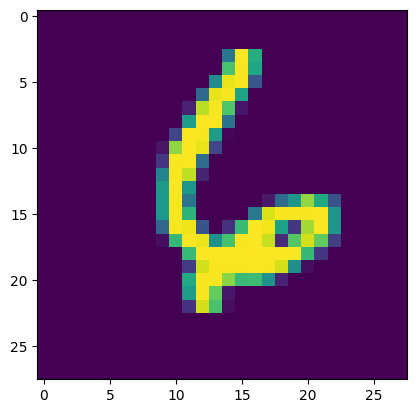

In [3]:
plt.imshow(x[59000].numpy())
plt.show()

In [4]:
""" We need to use hot encoding to convert the numerical representation of data into binary i.e. one hot encoding to classify them into 10 classes because we have a range of
n numbers of 0 to 9. We have 60000 images with the represnetation of handwritten 0 to 9 values with 60000 labels.
"""

' We need to use hot encoding to convert the numerical representation of data into binary i.e. one hot encoding to classify them into 10 classes because we have a range of\nn numbers of 0 to 9. We have 60000 images with the represnetation of handwritten 0 to 9 values with 60000 labels.\n'

In [5]:
y_new = F.one_hot(y,num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [6]:
x.shape

torch.Size([60000, 28, 28])

In [7]:
# Now we need to flatten the image which is 28*28 because we need them in vector form so we will multiply them and create into single 784 vector size

In [8]:
x.view(-1,28**2).shape # -1 means let the 60000 be as it is and change the vector form of 28*28

torch.Size([60000, 784])

### PyTorch Dataset Object

In [9]:
class CTDataset(Dataset):
  def __init__(self,filepath):
    self.x,self.y = torch.load(filepath)
    self.x = self.x/255 # This is done because the color of a pixel ranges between 0 to 255 and dividing by 255 will give the value between 0 and 1 which will be easier to calculate
    self.y = F.one_hot(self.y,num_classes=10).to(float)
  def __len__(self):
    return self.x.shape[0]
  def __getitem__(self,ix):
    return self.x[ix],self.y[ix]

In [10]:
train_ds = CTDataset("/training.pt")
test_ds = CTDataset("/test.pt")

In [11]:
len(train_ds) # Works due to __len__  function

60000

In [12]:
len(test_ds)

10000

In [13]:
train_ds[0]# Works due to __getitem__ function

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
xs,ys = train_ds[0:4]

In [15]:
xs.shape,ys.shape

(torch.Size([4, 28, 28]), torch.Size([4, 10]))

In [16]:
train_dl = DataLoader(train_ds,batch_size=5)

In [17]:
for x,y in train_dl:
  print(x.shape)
  print(y.shape)
  break
# There are 12000 different mini batches having batch size of 5 for each mini batch because of parameter of batch_size parameter

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [18]:
len(train_dl)

12000

### Cross Entropy Loss

In [19]:
L = nn.CrossEntropyLoss()

### The Network

In [20]:
class MNISTNeural(nn.Module):
  def __init__(self):
    super().__init__()
    self.matrix1 = nn.Linear(28**2,100)
    self.matrix2 = nn.Linear(100,50)
    self.matrix3 = nn.Linear(50,10)
    self.R = nn.ReLU()

  def forward(self,x):
    # print("Hi")
    x = x.view(-1,28**2)
    x = self.matrix3(self.R(self.matrix2(self.R(self.matrix1(x)))))
    return x.squeeze()

In [21]:
f = MNISTNeural()

In [22]:
xs

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [23]:
f(xs)

tensor([[ 0.1128, -0.1479,  0.1793, -0.0487, -0.0413,  0.0703, -0.0829, -0.0524,
          0.0616,  0.0121],
        [ 0.1034, -0.1428,  0.1332, -0.0071, -0.0443,  0.0589, -0.0976, -0.0753,
          0.0821,  0.0141],
        [ 0.0922, -0.1480,  0.1387,  0.0100, -0.0028,  0.0217, -0.1328, -0.0924,
          0.0726,  0.0570],
        [ 0.0492, -0.1303,  0.1490, -0.0340,  0.0025,  0.0448, -0.1050, -0.0769,
          0.0570,  0.0359]], grad_fn=<SqueezeBackward0>)

In [24]:
ys # We have to create a model in such a way that value of xs = ys. Meaning training xs to get the value of ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [25]:
loss = L(f(xs),ys)  # Running cross entropy loss function to minimize loss in xs to get value near to ys.
# We have to adjust the weights of to get the L variable as small as possible i.e. minimizing loss
loss.backward()
loss.item()

2.2987483739852905

In [26]:
def train_model(dl,f,n_epochs=20): # dl = Dataloader (mini batches), f = Neural network class
  opt = SGD(f.parameters(),lr = 0.01)
  L = nn.CrossEntropyLoss() # For Optimization

  losses = []
  epochs = []
  for epoch in range(n_epochs): # So in each epoch the 12000 batches will get trained i.e. 20*12000 time
    print(f"Epoch: {epoch}")
    N = len(dl)
    for i,(x,y) in enumerate(dl): # Loop 12000 times because taken mini batch size = 5 so 60000 images/5 = 12000 mini batches
      opt.zero_grad()
      loss_value = L(f(x),y)
      loss_value.backward()
      opt.step()

      #Store the training data
      epochs.append(epoch+i/N)
      losses.append(loss_value.item())
  return np.array(epochs),np.array(losses)

In [ ]:
epoch_data,loss_data = train_model(train_dl,f)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6


In [ ]:
plt.plot(epoch_data,loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')


In [ ]:
len(epoch_data)

In [ ]:
len(loss_data)

### Each one of these data points corresponds to the loss evaluated on a batch of 5 images.
An entire epoch is 60000 images. We can average the loss accros all the data per epoch to get the loss for all 60000 images
* Since there are 20 total epochs, we split the array above into 20 equal portions and take the mean of each portion

In [ ]:
epoch_data_avg = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avg = loss_data.reshape(20,-1).mean(axis=1)

In [ ]:
plt.plot(epoch_data_avg, loss_data_avg,'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')


In [ ]:
y_sample = train_ds[0][1]
y_sample

In [ ]:
x_sample = train_ds[0][0]
x_sample
yhat_sample = f(x_sample)
yhat_sample

In [ ]:
# To get what image this is, we should really be taking the index of the maximum value

torch.argmax(yhat_sample)

In [ ]:
plt.imshow(x_sample)

In [ ]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)


In [ ]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()


In [ ]:
xs, ys = test_ds[:2000]
yhats = f(xs).argmax(axis=1)


In [ ]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()
